<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Model_Evaluation_with_test_train_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kh
import os

In [ ]:
data_path = kh.dataset_download("camnugent/california-housing-prices")
os.listdir(data_path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.


['housing.csv']

In [ ]:
df = pd.read_csv(os.path.join(data_path, "housing.csv"))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [ ]:
X["ocean_proximity"]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.core.arrays import categorical
numeric_pipe = Pipeline([
    ("standard_scaler1", StandardScaler()),
    ("polynomial", PolynomialFeatures()),
    ("standard_scaler2", StandardScaler()),
])
categorical_pipe = Pipeline([
    ("one_hot_encoder", OneHotEncoder())
])
numeric_features = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
]
categorical_features = ["ocean_proximity"]

pipe = ColumnTransformer([
    ("numeric_pipe", numeric_pipe, numeric_features),
    ("categorical_pipe", categorical_pipe, categorical_features),
])

X_transformed = pipe.fit_transform(X)

In [ ]:
pipe

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('categorical_pipe',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['ocean_proximity'])])

In [ ]:
X_transformed

array([[ 0.        , -1.32731375,  1.05171726, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.32232256,  1.04235526, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.33230494,  1.03767426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        , -0.82320322,  1.77727236, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.87311515,  1.77727236, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.83318561,  1.74918635, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
pd.DataFrame(X_transformed)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.932392,...,0.008043,-2.354213,-0.009331,-2.432808,1.707895,0.0,0.0,0.0,1.0,0.0
1,0.0,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.916205,...,0.098093,2.062387,0.364741,4.099535,1.685646,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0.948640,...,-0.039817,-1.509342,-0.058808,-1.601849,0.826991,0.0,0.0,0.0,1.0,0.0
3,0.0,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.964950,...,-0.063843,-0.739768,-0.094109,-0.736753,-0.049177,0.0,0.0,0.0,1.0,0.0
4,0.0,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.964950,...,-0.079332,0.005029,-0.123156,-0.005456,-0.379484,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,0.0,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.520142,...,-0.125549,0.635580,-0.163726,0.555160,0.182345,0.0,1.0,0.0,0.0,0.0
20429,0.0,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-0.404566,...,0.008099,0.666568,0.003365,0.722474,-0.197774,0.0,1.0,0.0,0.0,0.0
20430,0.0,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.394538,...,-0.155579,0.428660,-0.197596,0.195556,0.116461,0.0,1.0,0.0,0.0,0.0
20431,0.0,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.290907,...,-0.123579,0.650129,-0.172199,0.424181,0.043008,0.0,1.0,0.0,0.0,0.0


In [ ]:
.2 * X.shape[0]

4086.6000000000004

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [ ]:
# Scale y values by fixed factor 100000
y = y / 1000_000

In [ ]:
y

,median_house_value
0,0.4526
1,0.3585
2,0.3521
3,0.3413
4,0.3422
...,...
20635,0.0781
20636,0.0771
20637,0.0923
20638,0.0847


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16346, 50), (16346,), (4087, 50), (4087,))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

array([0.2033137 , 0.17388077, 0.20793695, ..., 0.11526538, 0.12304743,
       0.14911837])

In [ ]:
mean_squared_error(y_train, lr.predict(X_train))

0.003936931144820592

In [ ]:
mean_squared_error(y_test, lr.predict(X_test))

0.004097824994328785

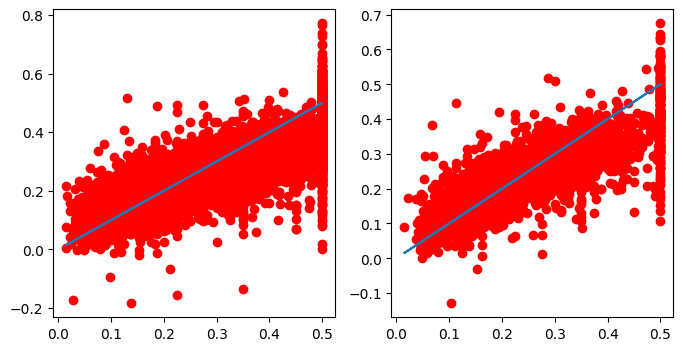

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(y_train, y_train)
plt.scatter(y_train, lr.predict(X_train), color="red")

plt.subplot(1,2,2)
plt.plot(y_test, y_test)
plt.scatter(y_test, lr.predict(X_test), color="red")

Use Support Vector Machine

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)

SVR(kernel='poly')

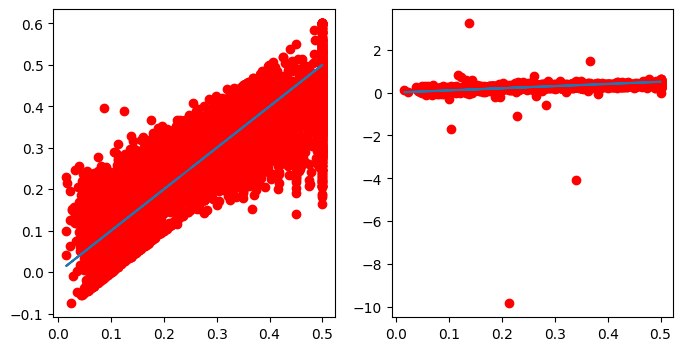

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(y_train, y_train)
plt.scatter(y_train, svr.predict(X_train), color="red")

plt.subplot(1,2,2)
plt.plot(y_test, y_test)
plt.scatter(y_test, svr.predict(X_test), color="red")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

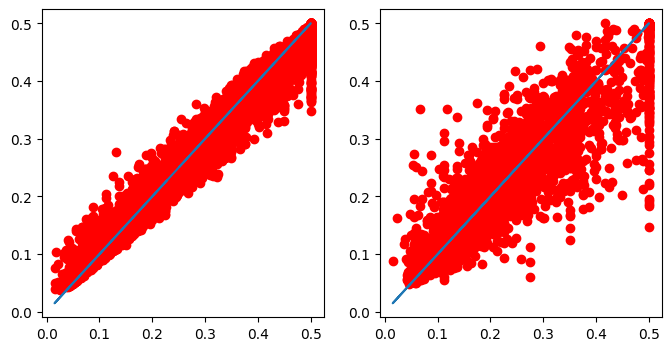

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(y_train, y_train)
plt.scatter(y_train, model.predict(X_train), color="red")

plt.subplot(1,2,2)
plt.plot(y_test, y_test)
plt.scatter(y_test, model.predict(X_test), color="red")

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from pandas.core.arrays import categorical
numeric_pipe = Pipeline([
    ("standard_scaler", StandardScaler()),
])
categorical_pipe = Pipeline([
    ("one_hot_encoder", OneHotEncoder())
])
pipe = ColumnTransformer([
    ("numeric_pipe", numeric_pipe, ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]),
    ("categorical_pipe", categorical_pipe, ["ocean_proximity"]),
])

X_ = pipe.fit_transform(X)

In [ ]:
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
rfe.support_

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False])

In [ ]:
pd.DataFrame(X_).columns[rfe.support_]

Index([0, 1, 7, 9, 10], dtype='int64')

In [ ]:
columns = pd.DataFrame(X).drop(columns=["ocean_proximity"]).columns
columns.to_list() + ["ocean_proximity1", "ocean_proximity2", "ocean_proximity3", "ocean_proximity4", "ocean_proximity5"]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity1',
 'ocean_proximity2',
 'ocean_proximity3',
 'ocean_proximity4',
 'ocean_proximity5']

In [ ]:
df_selected = pd.DataFrame(X_transformed)
df_selected.columns[rfe.support_]

Index([1, 2, 8, 32, 47], dtype='int64')

In [ ]:
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
X_selected = X_[:, rfe.support_]
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
lrm = LinearRegression()
lrm.fit(X_selected_train, y_train)

LinearRegression()

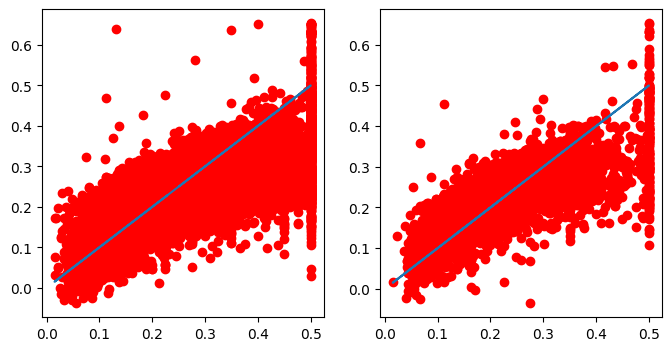

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(y_train, y_train)
plt.scatter(y_train, lrm.predict(X_selected_train), color="red")

plt.subplot(1,2,2)
plt.plot(y_test, y_test)
plt.scatter(y_test, lrm.predict(X_selected_test), color="red")